<a href="https://colab.research.google.com/github/IT21268830/DL-LAB07/blob/main/lab_7_AE_Vanilla_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [12]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()


In [13]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.



In [14]:
x_train = x_train[..., tf.newaxis] #adds a additional axis (60000,28,28) --> (60000,28,28,1)
x_test = x_test[..., tf.newaxis]
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


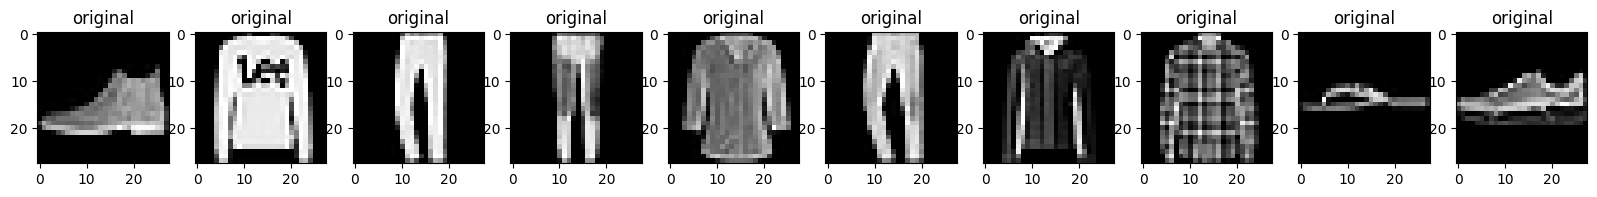

In [15]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
plt.show()

In [16]:
class Vanilla_CNN(Model):
    def __init__(self):
        super(Vanilla_CNN, self).__init__()
        self.encoder = tf.keras.Sequential([
          layers.Input(shape=(28, 28, 1)),
          layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
          layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

        self.decoder = tf.keras.Sequential([
          layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [17]:
autoencoder = Vanilla_CNN()

In [18]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [10]:
autoencoder.fit(x_train, x_train,
                epochs=30,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 45ms/step - loss: 0.0305 - val_loss: 0.0057
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 46ms/step - loss: 0.0051 - val_loss: 0.0040
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 132s 40ms/step - loss: 0.0036 - val_loss: 0.0031
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 43ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 47ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 41ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 89s 45ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 

In [19]:
autoencoder.encoder.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 8)             │           1,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,320 (5.16 KB)

 Trainable params: 1,320 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
autoencoder.decoder.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_transpose_2 (Conv2DTranspose) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

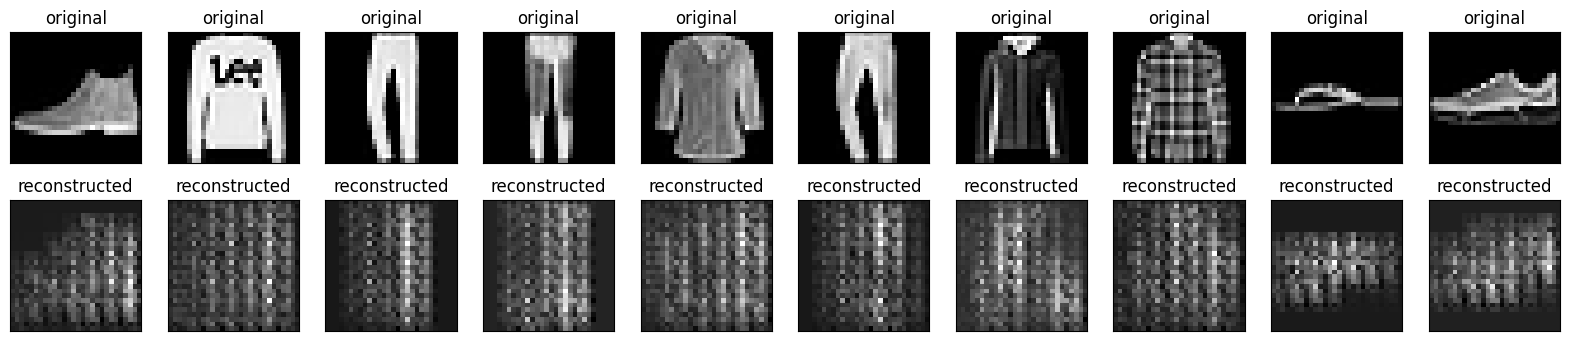

In [22]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

In [23]:
# Predict the reconstructed images from the test set
reconstructed_imgs = autoencoder.predict(x_test)

# Calculate the Mean Squared Error (MSE) for each image
mse = np.mean(np.square(x_test - reconstructed_imgs), axis=(1, 2, 3))

# Calculate the overall MSE for the entire test dataset
overall_mse = np.mean(mse)

print(f'Mean Squared Error on Test Dataset: {overall_mse}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Mean Squared Error on Test Dataset: 0.16994056105613708


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 39ms/step - loss: 0.0366 - val_loss: 0.0062
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 40ms/step - loss: 0.0055 - val_loss: 0.0044
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - loss: 0.0041 - val_loss: 0.0037
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 39ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - loss: 0.0025 - val_loss: 0.0025


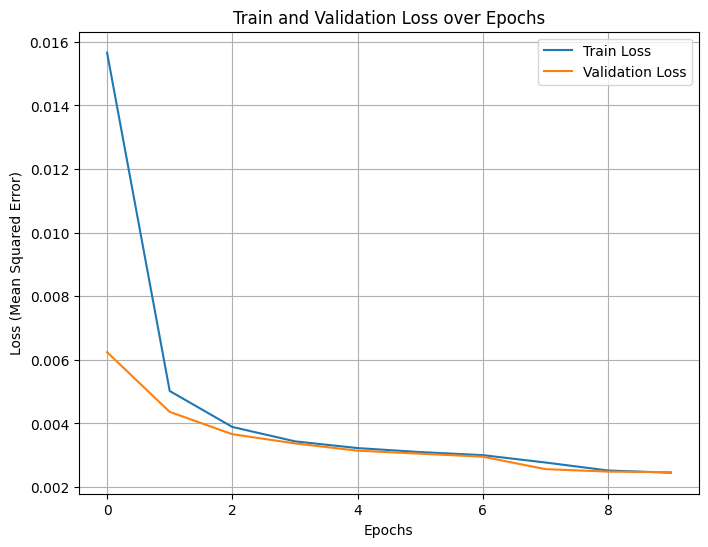

In [24]:
# Train the autoencoder and capture the history
history = autoencoder.fit(x_train, x_train,
                          epochs=10,
                          shuffle=True,
                          validation_data=(x_test, x_test))

# Plot training and validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)
plt.show()